In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
zcta = gpd.read_file('us-maps/geojson/zcta5.geo.json')

In [3]:
len(zcta)

33120

In [5]:
buffered_zcta = zcta.buffer(0.01)
buffered_zcta.to_file('buffered_zcta.geojson')

In [9]:
buffered_zcta.name = 'geometry'
bzdf = gpd.GeoDataFrame({'row_number': buffered_zcta.index.values, 'geometry': buffered_zcta.values}, geometry='geometry')

In [25]:
joined = gpd.sjoin(bzdf, bzdf)

In [32]:
joined.head()

,row_number_left,geometry,index_right,row_number_right
0,0,POLYGON ((-68.31481906907683 46.58354519474567...,233,233
22,22,POLYGON ((-68.78231725311984 46.40049062415828...,233,233
23,23,(POLYGON ((-68.39788870222719 46.1343965888343...,233,233
25,25,(POLYGON ((-68.57184914710952 46.7493557934336...,233,233
40,40,(POLYGON ((-69.4319358085874 45.70179838285605...,233,233


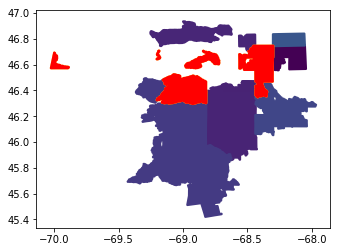

In [41]:
fig, ax = plt.subplots()

joined[joined.row_number_right == 233].plot('row_number_left', ax=ax)
joined[(joined.row_number_left == 233) & (joined.row_number_right == 233)].plot(ax=ax, color='red')

In [42]:
(joined.row_number_right == 233).sum()

8

In [48]:
joined.row_number_right.value_counts()

17266    48
841      42
844      42
555      42
869      42
847      42
1041     41
1047     41
17230    41
842      40
846      40
457      40
848      40
1046     40
17231    39
843      39
1295     38
1293     38
1292     38
1299     38
1294     37
1291     37
17233    37
1298     36
1300     36
1204     35
645      35
1211     35
1207     35
845      35
         ..
19993     1
20135     1
20121     1
20066     1
20152     1
19995     1
20174     1
30254     1
19699     1
19975     1
19983     1
20093     1
20080     1
20045     1
20052     1
20126     1
110       1
20118     1
19990     1
20116     1
20076     1
28980     1
20157     1
20047     1
19991     1
20082     1
23615     1
19165     1
252       1
20110     1
Name: row_number_right, Length: 33120, dtype: int64

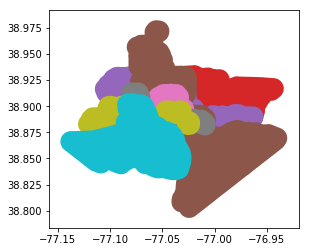

In [51]:
joined[joined.row_number_right == 17266].plot('row_number_left', categorical=True)

In [72]:
zcta.loc[17266]

ZCTA5CE10                                                 20024
GEOID10                                                   20024
CLASSFP10                                                    B5
MTFCC10                                                   G6350
FUNCSTAT10                                                    S
ALAND10                                             6.77028e+06
AWATER10                                            2.00332e+06
INTPTLAT10                                          +38.8760098
INTPTLON10                                         -077.0253225
geometry      (POLYGON ((-77.064251 38.888956, -77.064311 38...
Name: 17266, dtype: object

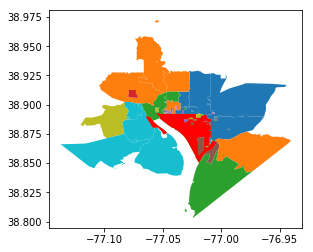

In [71]:
fig, ax = plt.subplots()

zcta.loc[joined[(joined.row_number_right == 17266)].row_number_left].plot('ZCTA5CE10', ax=ax, categorical=True)
zcta.loc[[17266]].plot(color='red', ax=ax)

In [78]:
mapper = dict(zip(zcta.index.values, zcta.ZCTA5CE10.values))

In [81]:
joined['zcta_left'] = joined.row_number_left.map(mapper)
joined['zcta_right'] = joined.row_number_right.map(mapper)

In [84]:
joined[['zcta_left', 'zcta_right']].to_csv('paired_zctas.csv', index=False)